In [ ]:
!pip install imbalanced-learn

In [ ]:
# prompt: import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder   #Feature Encoding
from sklearn.preprocessing import StandardScaler   # Feature Scaling

from sklearn.pipeline import Pipeline #Pipeline
from sklearn.compose import ColumnTransformer  # Combine Pipelines

from sklearn.feature_selection import SelectKBest, mutual_info_classif   #Feature Selection

#MODELS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Model Training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#RocAUC
from sklearn.metrics import roc_auc_score
#plot ROC
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('/content/Cleaned2_Churn.csv')
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,Churn
0,0,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,No
1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,No
2,0,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,Yes
3,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,No
4,0,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   StreamingTV       7032 non-null   object 
 10  StreamingMovies   7032 non-null   object 
 11  Contract          7032 non-null   object 
 12  PaperlessBilling  7032 non-null   object 
 13  PaymentMethod     7032 non-null   object 
 14  tenure            7032 non-null   int64  
 15  MonthlyCharges    7032 non-null   float64
 16  Churn             7032 non-null   object 


In [ ]:
X = df.drop('Churn', axis = 1)
y = df['Churn']


In [ ]:
# prompt: Handle class imbalance of y for classification models

# Install imbalanced-learn if not already installed


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the class distribution before handling imbalance
print("Original class distribution:\n", y.value_counts())

# Choose a method to handle imbalance. Two common methods are:
# 1. Random Oversampling: Duplicate samples from the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)
print("\nClass distribution after Random Oversampling:\n", y_resampled_over.value_counts())



Original class distribution:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Class distribution after Random Oversampling:
 Churn
No     5163
Yes    5163
Name: count, dtype: int64


In [ ]:

numerical_features = ['tenure', 'MonthlyCharges']
categorical_features = ['Partner', 'Dependents',
                        'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']

In [ ]:
#Creating Transformers for Numerical and Categorical Features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
numerical_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Partner', 'Dependents', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [ ]:
#Feature Selection
feature_selector = SelectKBest(score_func=mutual_info_classif, k=10)

In [ ]:
#Classification Models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}
models

{'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'DecisionTree': DecisionTreeClassifier(random_state=42),
 'RandomForest': RandomForestClassifier(random_state=42),
 'SVC': SVC(probability=True, random_state=42),
 'NaiveBayes': GaussianNB(),
 'KNN': KNeighborsClassifier()}

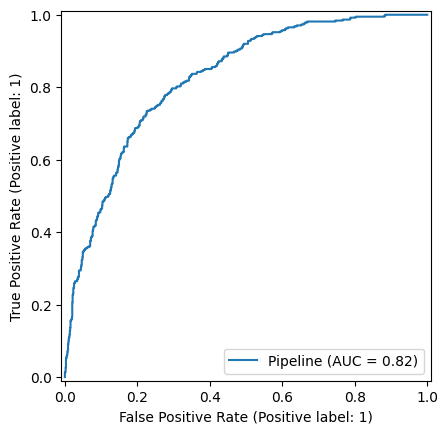

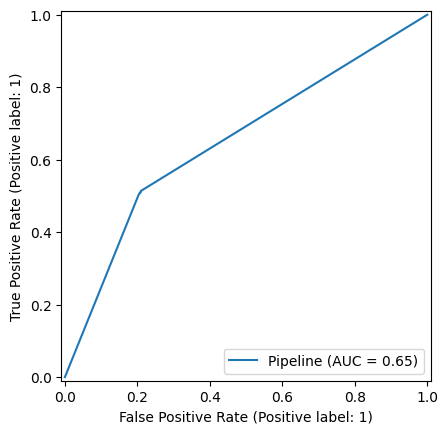

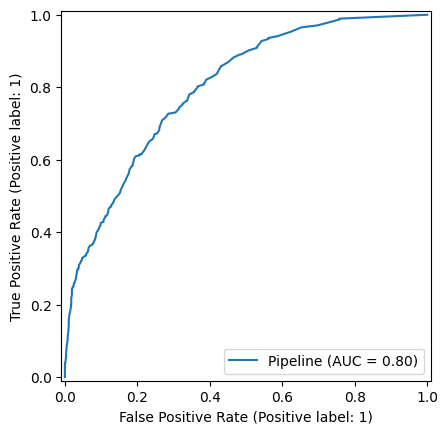

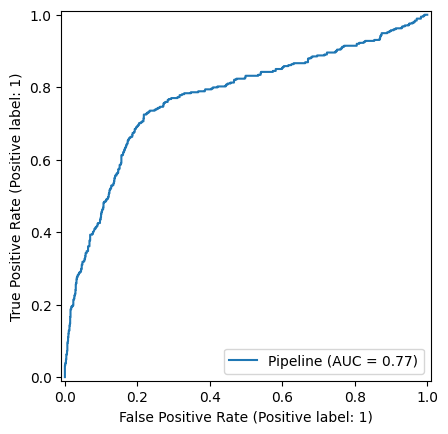

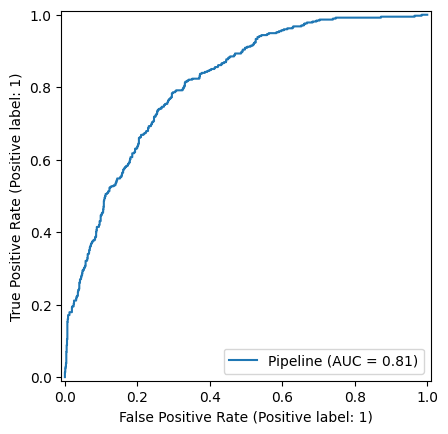

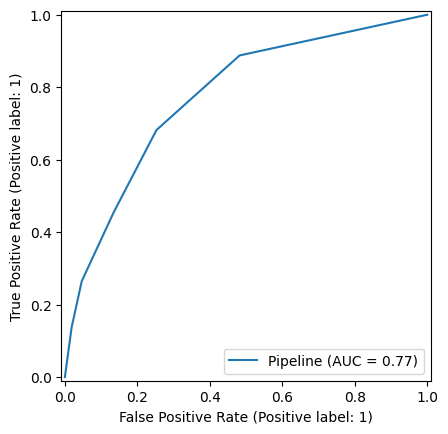

In [ ]:
# Label Encode the target variable 'y'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the encoded target variable along with the features
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Now, use y_train_encoded and y_test_encoded in the model training and evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results={}
#Creating a Pipeline
for model_name,model in models.items():
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('feature_selector', feature_selector),
                         ('classifier', model)])
  #Model Training
  # Fit the pipeline with the original X_train and encoded y_train
  pipe.fit(X_train,y_train_encoded)

  # Evaluate with cross-validation using original X and encoded y
  cv_scores = cross_val_score(pipe, X, y_encoded, cv=cv, scoring='accuracy')

  #Testing
  # Predict using the original X_test
  y_pred_encoded=pipe.predict(X_test)
  # Predict probabilities for ROC AUC (requires predict_proba)
  if hasattr(pipe, 'predict_proba'):
      y_pred_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
  else:
      y_pred_proba = y_pred_encoded # Use predicted class if probabilities not available


  # Use RocCurveDisplay.from_estimator to plot the ROC curve
  # Use y_test_encoded for plotting
  roc_curve_display = RocCurveDisplay.from_estimator(pipe, X_test, y_test_encoded)


  results[model_name] = {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_encoded),
        'CV Mean Accuracy': cv_scores.mean(),
        'Classification Report': classification_report(y_test_encoded, y_pred_encoded),
        'Confusion Matrix': confusion_matrix(y_test_encoded, y_pred_encoded),
        'ROC AUC': roc_auc_score(y_test_encoded, y_pred_proba), # Use probabilities for ROC AUC
    }



In [ ]:
print("\n--- Model Evaluation Results ---")

# Iterate through the results and plot the ROC curve for each model individually
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric in ['Accuracy', 'CV Mean Accuracy', 'ROC AUC','']:
          print(f"  {metric}: {value:.4f}")
        elif metric == 'Classification Report' or metric == 'Confusion Matrix':
              print(f"  {metric}: \n{value}") # Print the object representation
     # Generate the ROC curve display



--- Model Evaluation Results ---

Model: LogisticRegression
  Accuracy: 0.7292
  CV Mean Accuracy: 0.7382
  Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

  Confusion Matrix: 
[[732 301]
 [ 80 294]]
  ROC AUC: 0.8241

Model: DecisionTree
  Accuracy: 0.7186
  CV Mean Accuracy: 0.7305
  Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.47      0.50      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

  Confusion Matrix: 
[[823 210]
 [186 188]]
  ROC AUC: 0.6


--- ROC Curves for All Models ---


<Figure size 1000x800 with 0 Axes>

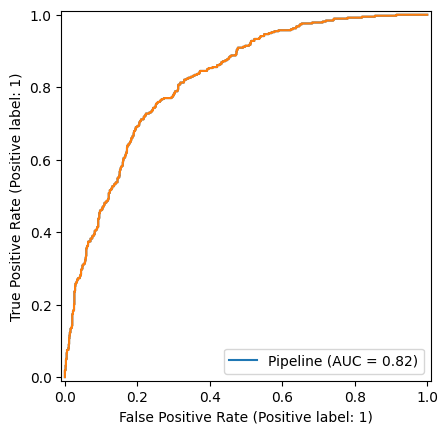

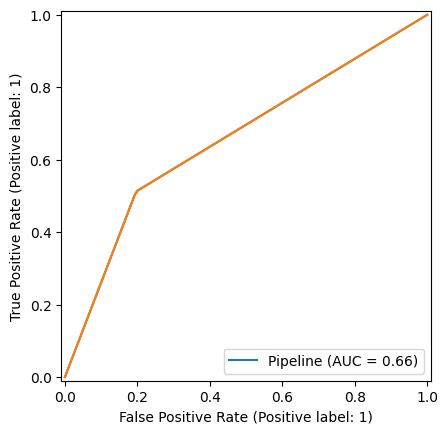

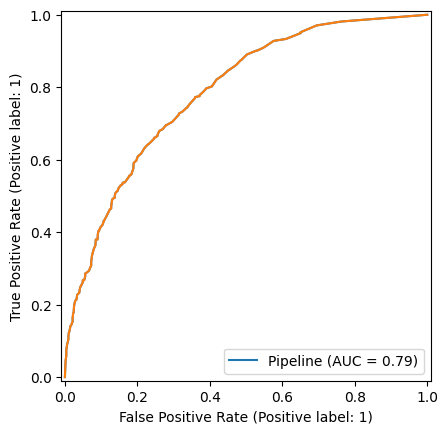

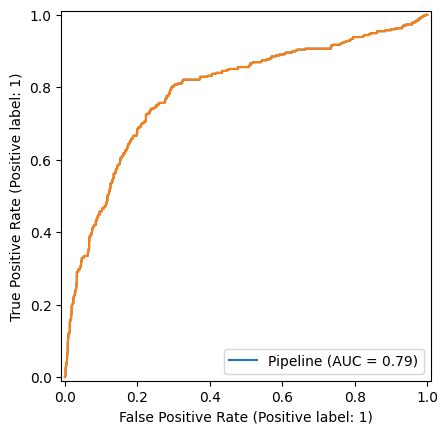

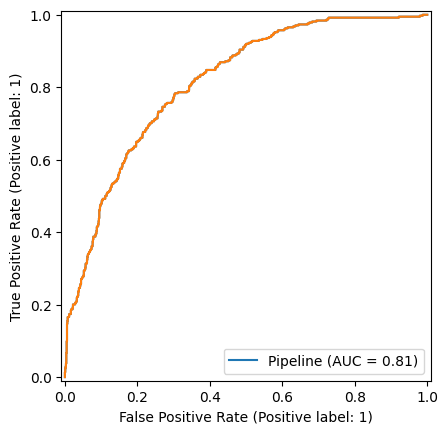

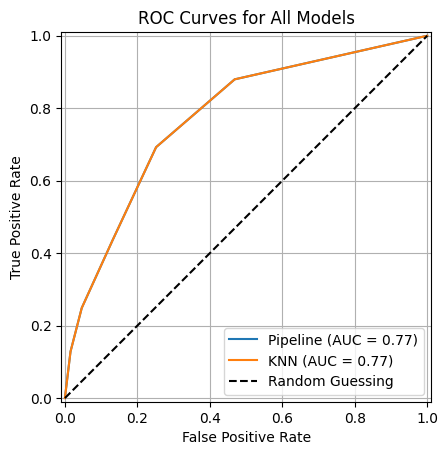

In [ ]:
# prompt: roc plot for all models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score

print("\n--- ROC Curves for All Models ---")

plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selector', feature_selector),
                           ('classifier', model)])
    pipe.fit(X_train, y_train_encoded) # Fit the pipeline for plotting

    roc_curve_display = RocCurveDisplay.from_estimator(pipe, X_test, y_test_encoded)

    # Plot the ROC curve
    plt.plot(roc_curve_display.fpr, roc_curve_display.tpr, label=f'{model_name} (AUC = {roc_curve_display.roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


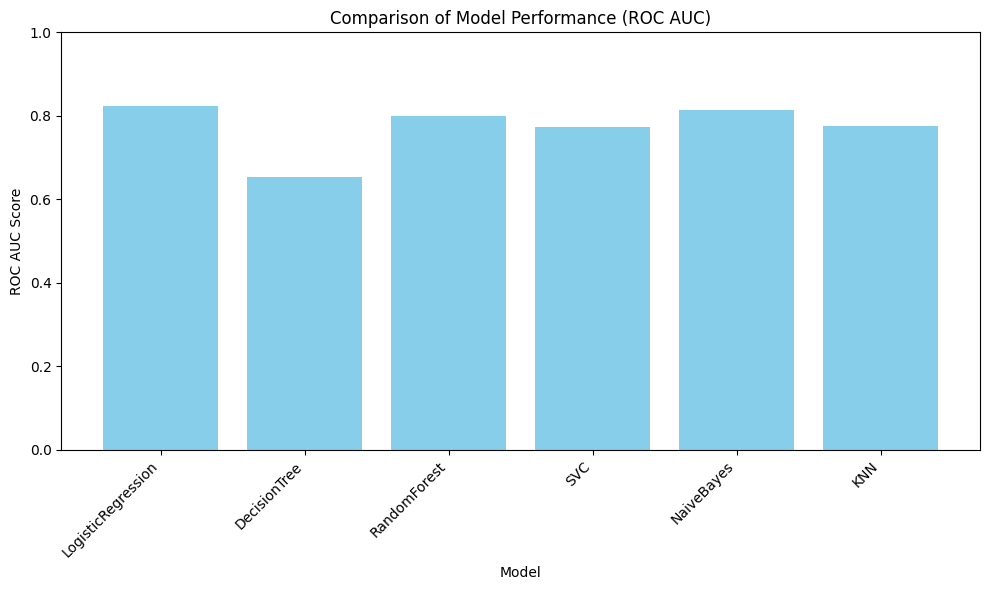

In [ ]:
# prompt: Comparison of models results with  barchar

import matplotlib.pyplot as plt
# Extract model names and their ROC AUC scores
model_names = list(results.keys())
roc_auc_scores = [metrics['ROC AUC'] for metrics in results.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Model Performance (ROC AUC)')
plt.ylim(0, 1) # ROC AUC scores are between 0 and 1
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate y_proba for the best_model (Logistic Regression)
# Assuming best_pipeline is already defined and fitted from previous cells
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_proba)
f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

# Find the threshold that gives max F1-score
best_idx = f1.argmax()
best_threshold = thresholds[best_idx]

print(f"Best Threshold = {best_threshold:.2f}")
print(f"Precision = {precision[best_idx]:.2f}")
print(f"Recall = {recall[best_idx]:.2f}")
print(f"F1 Score = {f1[best_idx]:.2f}")

Best Threshold = 0.62
Precision = 0.57
Recall = 0.68
F1 Score = 0.62


In [ ]:
# prompt: save logistic regression model

import joblib

# Define the model to save
# Let's assume you want to save the Logistic Regression model pipeline as recommended

# Get the Logistic Regression pipeline from the training loop
# We need to create it again or get it from the results dictionary if saved there.
# A cleaner way is to define the best model pipeline explicitly
best_model_name = 'LogisticRegression' # Based on the analysis
best_model = models[best_model_name]

# Create the pipeline for the best model
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', best_model)
])

# Fit the best pipeline with the training data
best_pipeline.fit(X_train, y_train_encoded)

# Define the filename for the saved model
filename = f'{best_model_name}_churn_model.pkl'

# Save the fitted pipeline to a file
joblib.dump(best_pipeline, filename)

print(f"Model '{best_model_name}' pipeline saved successfully to '{filename}'")

# To load the model later:
# loaded_model = joblib.load(filename)
# print("Model loaded successfully.")
# Make predictions with the loaded model:
# loaded_predictions = loaded_model.predict(X_test)


Model 'LogisticRegression' pipeline saved successfully to 'LogisticRegression_churn_model.pkl'


In [ ]:
!pip install streamlit joblib


In [ ]:

%%writefile app.py

import streamlit as st
import joblib
import pandas as pd

# Load the trained model pipeline
# Make sure the 'LogisticRegression_churn_model.pkl' file is available in the environment where you run the streamlit app
try:
    loaded_pipeline = joblib.load('LogisticRegression_churn_model.pkl')
except FileNotFoundError:
    st.error("Model file 'LogisticRegression_churn_model.pkl' not found. Please ensure it's in the same directory.")
    st.stop() # Stop the app execution if model is not found

st.title("Customer Churn Prediction App")

st.write("""
Predict if a customer is likely to churn based on their characteristics.
Fill in the customer details below and click 'Predict Churn'.
""")

# Create input fields for each feature used in the model
# Refer to your original feature lists: numerical_features, categorical_features

# Numerical Features
st.subheader("Numerical Features")
tenure = st.slider("Tenure (Months)", min_value=0, max_value=72, value=1, step=1)
monthly_charges = st.slider("Monthly Charges", min_value=0.0, max_value=120.0, value=20.0, step=0.1)

# Categorical Features
st.subheader("Categorical Features")
partner = st.selectbox("Partner", options=['Yes', 'No'])
dependents = st.selectbox("Dependents", options=['Yes', 'No'])
multiple_lines = st.selectbox("Multiple Lines", options=['Yes', 'No'])
online_security = st.selectbox("Online Security", options=['Yes', 'No'])
online_backup = st.selectbox("Online Backup", options=['Yes', 'No'])
device_protection = st.selectbox("Device Protection", options=['Yes', 'No'])
tech_support = st.selectbox("Tech Support", options=['Yes', 'No'])
streaming_tv = st.selectbox("Streaming TV", options=['Yes', 'No'])
streaming_movies = st.selectbox("Streaming Movies", options=['Yes', 'No'])
contract = st.selectbox("Contract", options=['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.selectbox("Paperless Billing", options=['Yes', 'No'])
payment_method = st.selectbox("Payment Method", options=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])


# Create a button to trigger prediction
if st.button("Predict Churn"):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'tenure': [tenure],
        'MonthlyCharges': [monthly_charges],
        'Partner': [partner],
        'Dependents': [dependents],
        'MultipleLines': [multiple_lines],
        'OnlineSecurity': [online_security],
        'OnlineBackup': [online_backup],
        'DeviceProtection': [device_protection],
        'TechSupport': [tech_support],
        'StreamingTV': [streaming_tv],
        'StreamingMovies': [streaming_movies],
        'Contract': [contract],
        'PaperlessBilling': [paperless_billing],
        'PaymentMethod': [payment_method]
    })

    # Make prediction using the loaded pipeline
    prediction_encoded = loaded_pipeline.predict(input_data)
    prediction_proba = loaded_pipeline.predict_proba(input_data)[:, 1] # Probability of churn (class 1)

    # Decode the prediction (assuming 0 is No Churn, 1 is Churn)
    # You'll need the LabelEncoder used during training to decode correctly
    # Since you fit the LabelEncoder on 'y', we can assume y_encoded is 0 for No Churn, 1 for Churn
    # A more robust way would be to save and load the LabelEncoder as well.
    # For simplicity here, we'll just use the integer output and probability.
    threshold = 0.67
    churn_status = 1 if prediction_proba[0] >= threshold else 0
    #churn_status = "Churn" if prediction_encoded[0] == 1 else "No Churn"


    # Display the prediction
    st.subheader("Prediction Result")
    if churn_status == "Churn":
        st.error(f"Based on the provided information, this customer is predicted to **{churn_status}**.")
    else:
        st.success(f"Based on the provided information, this customer is predicted to **{churn_status}**.")

    st.write(f"Probability of Churn: **{prediction_proba[0]:.2f}**")

# Instructions on how to run this script in Colab (optional, for user reference)


Overwriting app.py


In [ ]:
# prompt: curl ip address

!curl ipinfo.io/ip

34.83.19.221

In [ ]:
# prompt: streamlit run code

!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501


34.83.19.221


⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.19.221:8501

⠴⠦⠧⠇⠏⠋your url is: https://nine-needles-unite.loca.lt
  Stopping...
^C


In [ ]:
# prompt: data for yes class and no class

print("Class distribution after handling imbalance:")
print(y_resampled_over.value_counts())

Class distribution after handling imbalance:
Churn
No     5163
Yes    5163
Name: count, dtype: int64


#INVESTIGATING WHY MODEL IS NOT PREDICTING CHURN

In [ ]:
# prompt: best_model as logistic regression model

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('feature_selector', feature_selector),
                             ('classifier', LogisticRegression(max_iter=1000, random_state=42,class_weight='balance'))])


In [ ]:
import numpy as np
# Fit the best_model pipeline to the training data
best_model.fit(X_train, y_train_encoded)

unique, counts = np.unique(best_model.predict(X_test), return_counts=True)
print(dict(zip(unique, counts)))

ValueError: could not convert string to float: 'No'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, best_model.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Yes'

#OTHER POSSIBLIES


In [ ]:
# prompt: by='ROC AUC' add accuracy

# Update the results dictionary to include Accuracy
for model_name, model in models.items():
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('feature_selector', feature_selector),
                         ('classifier', model)])
  #Model Training
  # Fit the pipeline with the original X_train and encoded y_train
  pipe.fit(X_train,y_train_encoded)

  # Evaluate with cross-validation using original X and encoded y
  cv_scores = cross_val_score(pipe, X, y_encoded, cv=cv, scoring='accuracy')

  #Testing
  # Predict using the original X_test
  y_pred_encoded=pipe.predict(X_test)
  # Predict probabilities for ROC AUC (requires predict_proba)
  if hasattr(pipe, 'predict_proba'):
      y_pred_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
  else:
      y_pred_proba = y_pred_encoded # Use predicted class if probabilities not available


  # Use RocCurveDisplay.from_estimator to plot the ROC curve
  # Use y_test_encoded for plotting
  # We plot outside the loop to combine them on one plot later
  # roc_curve_display = RocCurveDisplay.from_estimator(pipe, X_test, y_test_encoded)


  results[model_name] = {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_encoded),
        'CV Mean Accuracy': cv_scores.mean(),
        'Classification Report': classification_report(y_test_encoded, y_pred_encoded),
        'Confusion Matrix': confusion_matrix(y_test_encoded, y_pred_encoded),
        'ROC AUC': roc_auc_score(y_test_encoded, y_pred_proba), # Use probabilities for ROC AUC
    }


print("\n--- Model Evaluation Results ---")

# Iterate through the results and print metrics
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric in ['Accuracy', 'CV Mean Accuracy', 'ROC AUC']:
          print(f"  {metric}: {value:.4f}")
        elif metric == 'Classification Report':
              print(f"  {metric}: \n{value}")


In [ ]:
# prompt: model training

import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import joblib

# Handle Imbalance - Random Oversampling
# The imbalanced-learn library needs to be installed first
# !pip install imbalanced-learn # Already in the preceding code

# Check the class distribution before handling imbalance
print("Original class distribution:\n", y.value_counts())

# Choose a method to handle imbalance. Two common methods are:
# 1. Random Oversampling: Duplicate samples from the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)
print("\nClass distribution after Random Oversampling:\n", y_resampled_over.value_counts())


# Split the resampled data
X_train, X_test, y_train_resampled, y_test = train_test_split(X_resampled_over, y_resampled_over, test_size=0.2, random_state=42, stratify=y_resampled_over)

# Label Encode the target variable 'y_train_resampled' and 'y_test'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test) # Use transform on test set

# Now, use y_train_encoded and y_test_encoded in the model training and evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results={}
#Creating a Pipeline
for model_name,model in models.items():
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('feature_selector', feature_selector),
                         ('classifier', model)])
  #Model Training
  # Fit the pipeline with the original X_train and encoded y_train
  pipe.fit(X_train,y_train_encoded)

  # Evaluate with cross-validation using resampled X and encoded y
  cv_scores = cross_val_score(pipe, X_resampled_over, y_resampled_over, cv=cv, scoring='accuracy')

  #Testing
  # Predict using the original X_test
  y_pred_encoded=pipe.predict(X_test)

  # Predict probabilities for ROC AUC (requires predict_proba)
  if hasattr(pipe, 'predict_proba'):
      y_pred_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
  else:
      y_pred_proba = y_pred_encoded # Use predicted class if probabilities not available

  # Use RocCurveDisplay.from_estimator to plot the ROC curve
  # Use y_test_encoded for plotting
  # The plotting should be done outside the loop to display all curves on the same plot
  # RocCurveDisplay.from_estimator(pipe, X_test, y_test_encoded)


  results[model_name] = {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_encoded),
        'CV Mean Accuracy': cv_scores.mean(),
        'Classification Report': classification_report(y_test_encoded, y_pred_encoded),
        'Confusion Matrix': confusion_matrix(y_test_encoded, y_pred_encoded),
        'ROC AUC': roc_auc_score(y_test_encoded, y_pred_proba), # Use probabilities for ROC AUC
    }


print("\n--- Model Evaluation Results ---")

# Iterate through the results and plot the ROC curve for each model individually
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric in ['Accuracy', 'CV Mean Accuracy', 'ROC AUC']:
          print(f"  {metric}: {value:.4f}")
        elif metric == 'Classification Report':
              print(f"  {metric}: \n{value}") # Print the object representation
     # Generate the ROC curve display

print("\n--- ROC Curves for All Models ---")

plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selector', feature_selector),
                           ('classifier', model)])
    pipe.fit(X_train, y_train_encoded) # Fit the pipeline for plotting

    # Use plot_roc_curve from sklearn.metrics
    RocCurveDisplay.from_estimator(pipe, X_test, y_test_encoded, ax=plt.gca(), name=model_name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


# Extract model names and their ROC AUC scores
model_names = list(results.keys())
roc_auc_scores = [metrics['ROC AUC'] for metrics in results.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Model Performance (ROC AUC)')
plt.ylim(0, 1) # ROC AUC scores are between 0 and 1
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Create a comparison chart for accuracy and ROC AUC score with different colors

accuracy_scores = [metrics['Accuracy'] for metrics in results.values()]

x = np.arange(len(model_names)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='salmon')
rects2 = ax.bar(x + width/2, roc_auc_scores, width, label='ROC AUC', color='teal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance: Accuracy vs. ROC AUC')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add labels to the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0, 1.1) # Set y-axis limit slightly above 1 for better visualization of labels
plt.show()



# Find the best model based on Accuracy
best_accuracy_model_name = max(results, key=lambda name: results[name]['Accuracy'])
best_accuracy = results[best_accuracy_model_name]['Accuracy']

# Find the best model based on ROC AUC Score
best_roc_auc_model_name = max(results, key=lambda name: results[name]['ROC AUC'])
best_roc_auc = results[best_roc_auc_model_name]['ROC AUC']

print(f"\nModel with the highest Accuracy: {best_accuracy_model_name} (Accuracy: {best_accuracy:.4f})")
print(f"Model with the highest ROC AUC Score: {best_roc_auc_model_name} (ROC AUC: {best_roc_auc:.4f})")



# Define the model to save
# Let's assume you want to save the Logistic Regression model pipeline as recommended

# Get the Logistic Regression pipeline from the training loop
# We need to create it again or get it from the results dictionary if saved there.
# A cleaner way is to define the best model pipeline explicitly
best_model_name = 'LogisticRegression' # Based on the analysis
best_model = models[best_model_name]

# Create the pipeline for the best model
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', best_model)
])

# Fit the best pipeline with the training data
best_pipeline.fit(X_train, y_train_encoded)

# Define the filename for the saved model
filename = f'{best_model_name}_churn_model.pkl'

# Save the fitted pipeline to a file
joblib.dump(best_pipeline, filename)

print(f"Model '{best_model_name}' pipeline saved successfully to '{filename}'")

# To load the model later:
# loaded_model = joblib.load(filename)
# print("Model loaded successfully.")
# Make predictions with the loaded model:
# loaded_predictions = loaded_model.predict(X_test)


#Multiple Encoding

In [ ]:
label_cat = ['Partner', 'Dependents', 'MultipleLines',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

contract_order = [['Month-to-month', 'One year', 'Two year']]
ordinal_cat = ['Contract']
nominal_cat = ['InternetService', 'PaymentMethod']
numerical_features=['tenure', 'MonthlyCharges'] # Identified from df.info()


# Changed to OrdinalEncoder
le_transformer = Pipeline(steps=[
    ('ordinalencoder', OrdinalEncoder())
])

# Ordinal Encoder for ordinal categories
oe_transformer = Pipeline(steps=[
    ('ordinalencoder', OrdinalEncoder(categories=contract_order))
])

# One-Hot Encoder for nominal categories
ohe_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()) # Apply StandardScaler for feature scaling
])


# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('le', le_transformer, label_cat),
        ('oe', oe_transformer, ordinal_cat),
        ('ohe', ohe_transformer, nominal_cat),
        ('num', numerical_pipeline, numerical_features) # Add the numerical pipeline

    ],
    remainder='passthrough' # Keep other columns (numerical features)
)

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# The result is a numpy array, you might want to convert it back to a DataFrame
# The column names will be different and require careful handling
# For simplicity here, we just show the transformation
print("Transformed data shape:", X_transformed.shape)
print("Transformed data example:")
print(X_transformed[:5])

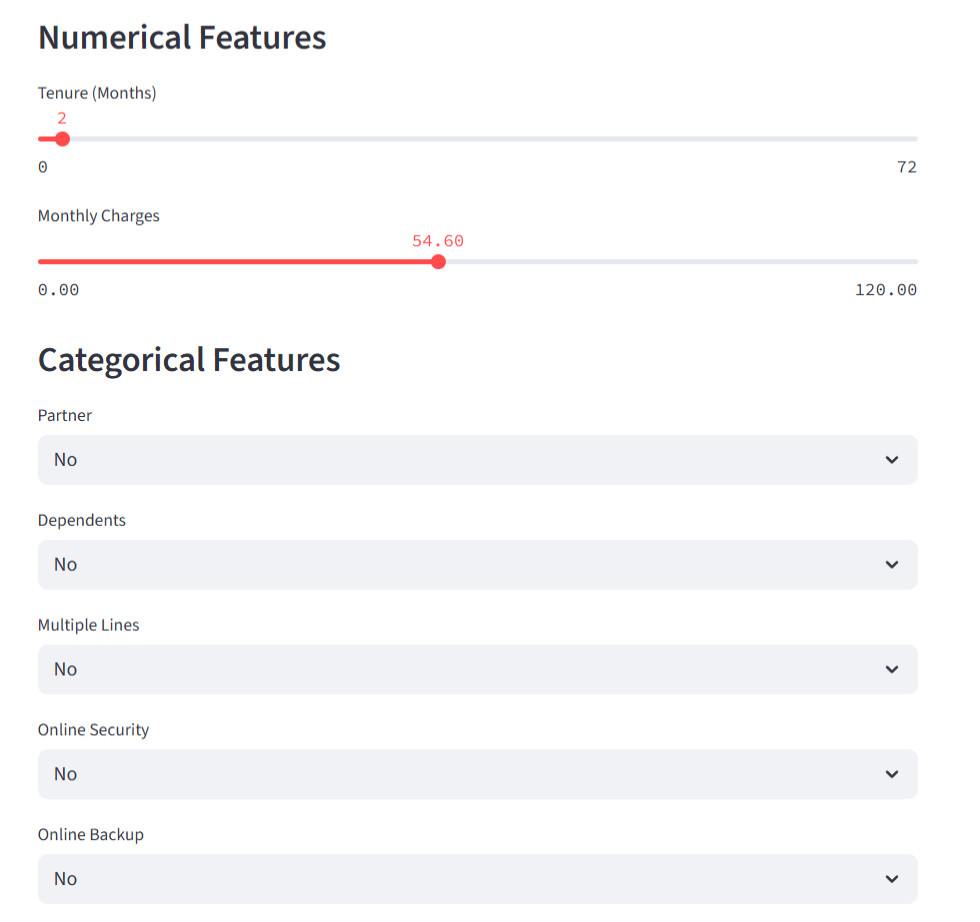

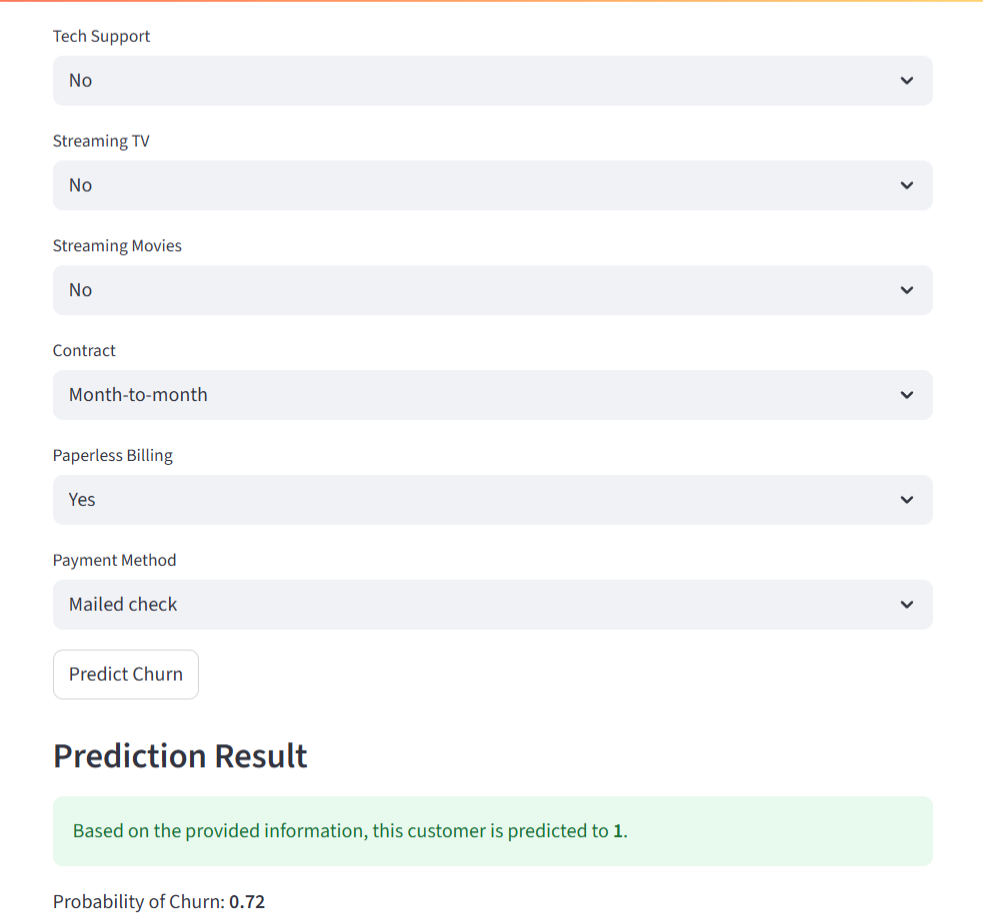

#CLASS 0 NOT CHURN





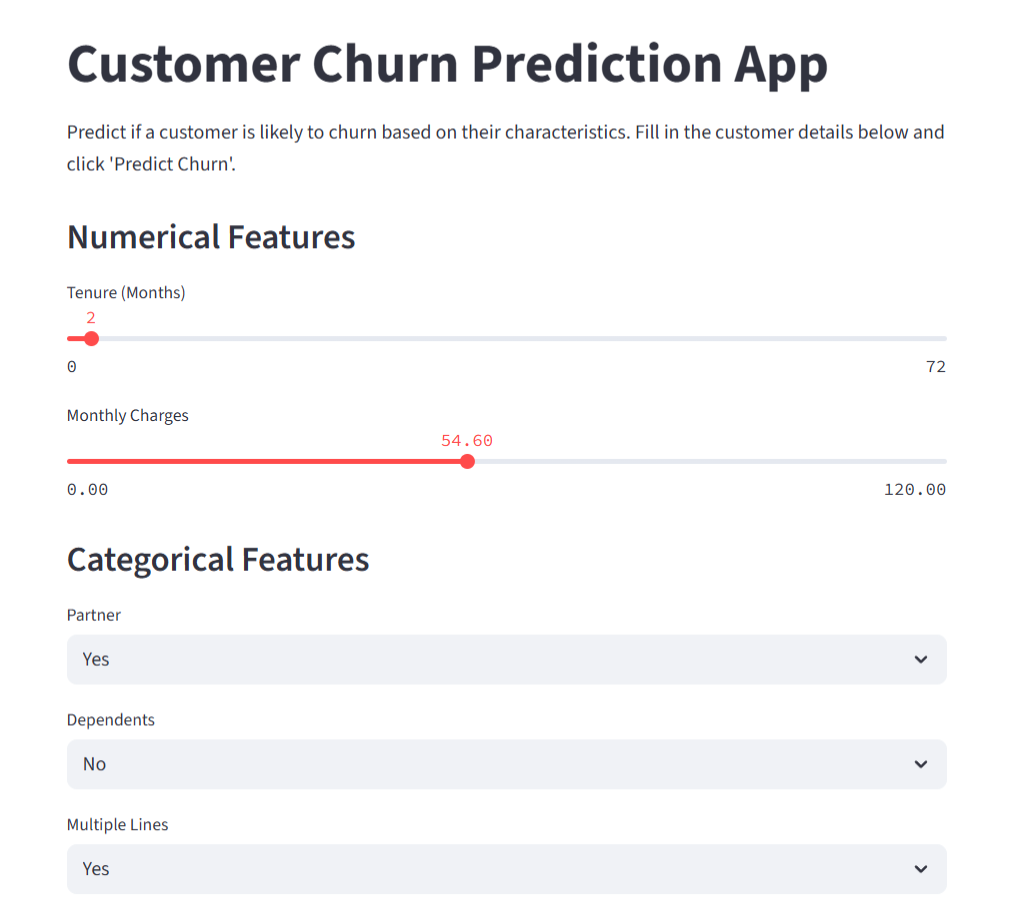

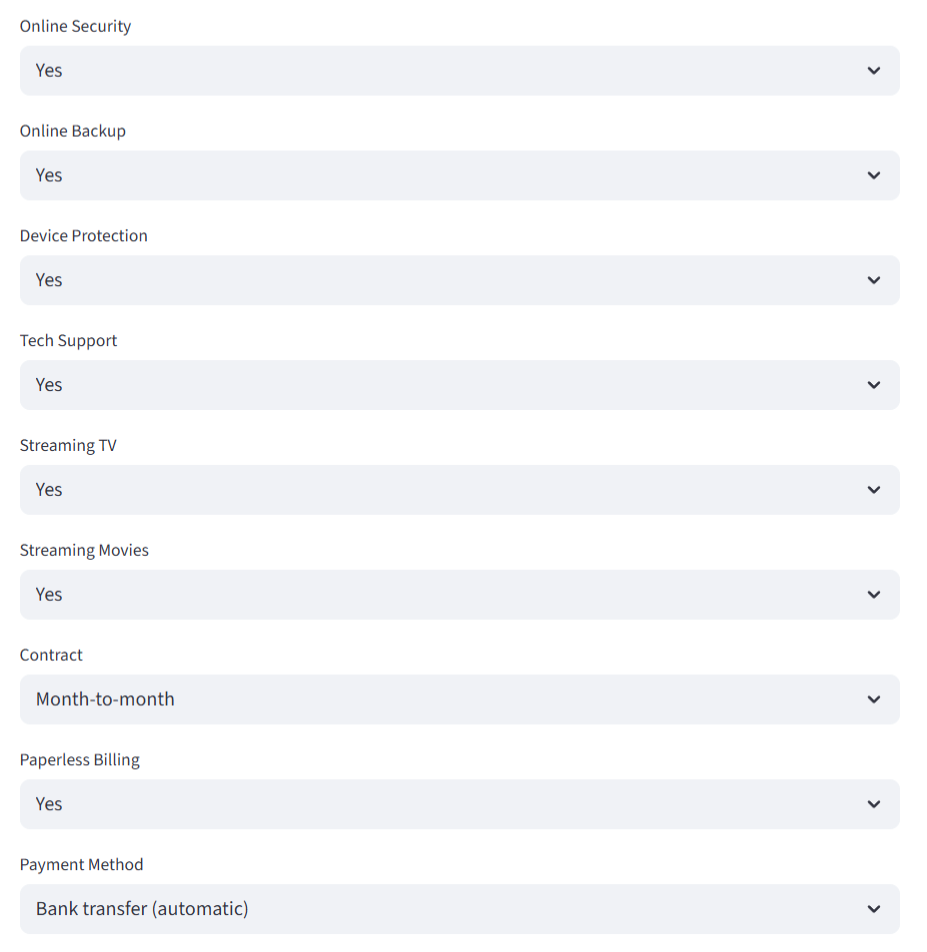